# Point Processing Operations on an Image
# 1. Negation
# 2. Log Transformation
# 3. Power Law Transformation
# 4. Image Flipping

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

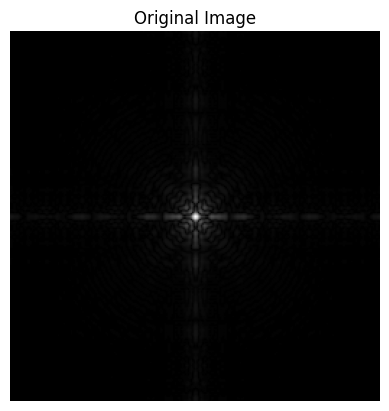

In [7]:
img1 = cv2.imread("Images/Log.bmp",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img1,cmap = 'gray')
plt.show()

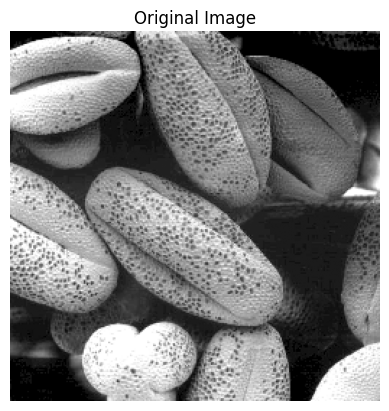

In [8]:
img2 = cv2.imread("Images/hist8.bmp",cv2.IMREAD_GRAYSCALE)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img2,cmap = 'gray')
plt.show()

# Negation

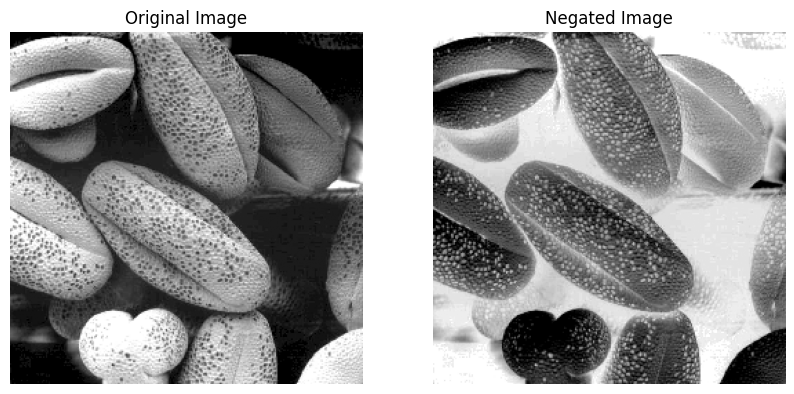

In [9]:
# Negation 
"""Remove the comments from the code below"""
# negated_img = 255 - img2
# plt.title("Negation of the Image")
# plt.axis("off")
# plt.imshow(negated_img,cmap = 'gray')
# plt.show()

# OR If you want to do it using for loop

m,n = img2.shape
result = np.zeros_like(img2,dtype = np.float32)
for i in range(m):
    for j in range(n):
        result[i][j] = 255 - img2[i][j]
result = result.astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img2,cmap = 'gray')

plt.subplot(1,2,2)
plt.title("Negated Image")
plt.axis("off")
plt.imshow(result,cmap = 'gray')
plt.show()

# Log Transform

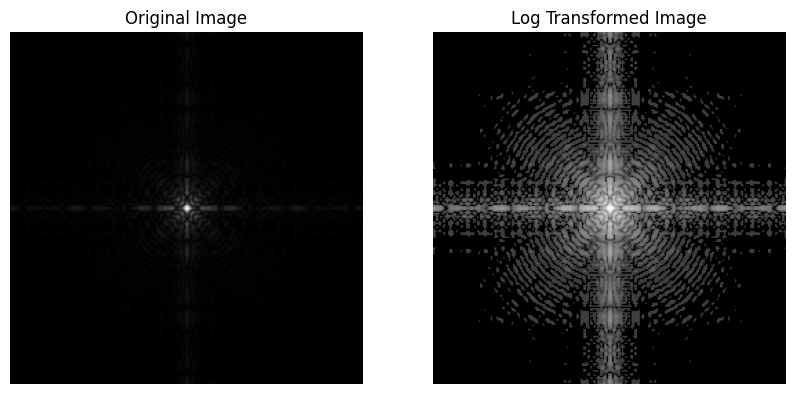

In [3]:
# Log Transformation (s = c * log(1 + r))
# where c = 255 / (log(1 + np.max(img)))


c = 255 / (np.log(1 + np.max(img1)))
"""Remove the comments from the code below"""
# log_transformed_img = c * np.log(1 + img1)
# plt.title("Log Transformed Image")
# plt.axis("off")
# plt.imshow(log_transformed_img,cmap = 'gray')
# plt.show()


# OR If you want to do it using for loop

m,n = img1.shape
result1 = np.zeros_like(img1,dtype = np.float32)
for i in range(m):
    for j in range(n):
        result1[i][j] = c * np.log(1 + img1[i,j])
result1 = result1.astype(np.uint8)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(img1,cmap = 'gray')

plt.subplot(1,2,2)
plt.title("Log Transformed Image")
plt.axis("off")
plt.imshow(result1,cmap = 'gray')
plt.show()


# Power Law Transform (Gamma > 1)

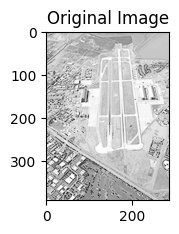

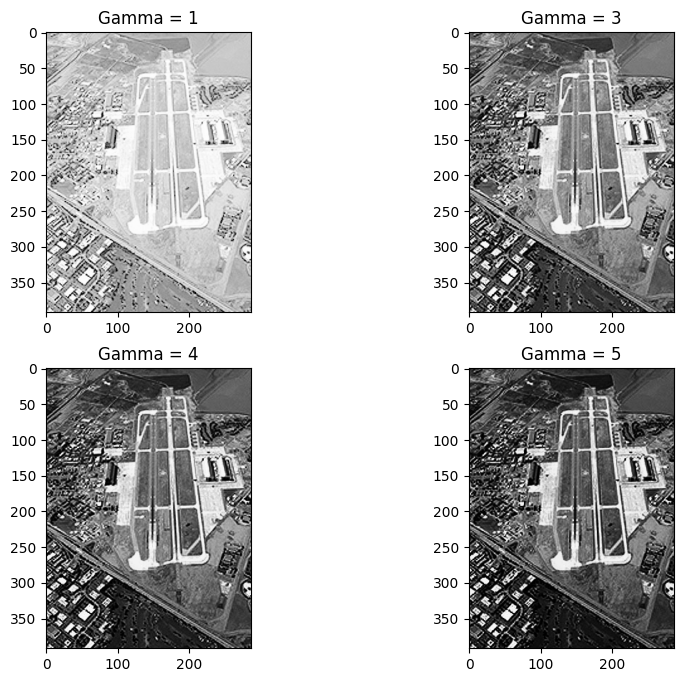

In [4]:
power_law = cv2.imread("Images/Power law.bmp")

gamma = [1,3, 4, 5]
# plt.figure(figsize=(10, 8))
plt.subplot(2,2, 1)
plt.title('Original Image')
plt.imshow(power_law, cmap='gray')
plt.figure(figsize=(10, 8))
for i in range(len(gamma)):
    power_law_transformed = np.uint8(255 * (power_law / 255) ** gamma[i])
    plt.subplot(2, 2, i+1)
    plt.title(f'Gamma = {gamma[i]}')
    plt.imshow(power_law_transformed, cmap='gray')

# Power Law Transform (Gamma < 1)

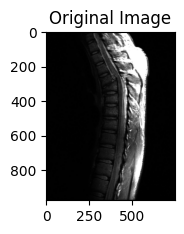

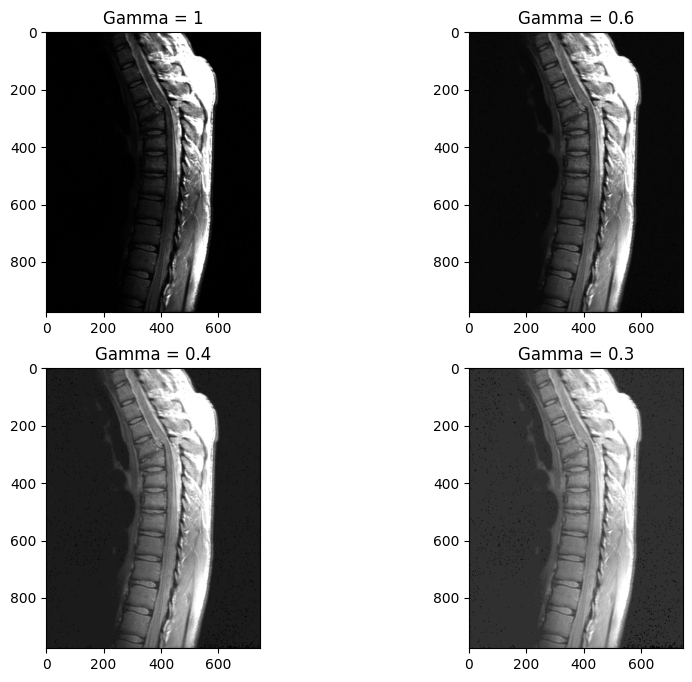

In [5]:

power_law_below_1 = cv2.imread("Images/Fig0308(a)(fractured_spine).tif")

gamma = [1, 0.6, 0.4, 0.3]
# plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(power_law_below_1, cmap='gray')
plt.figure(figsize=(10, 8))
for i in range(len(gamma)):
    power_law_transformed = np.uint8(255 * (power_law_below_1 / 255) ** gamma[i])
    plt.subplot(2, 2, i+1)
    plt.title(f'Gamma = {gamma[i]}')
    plt.imshow(power_law_transformed, cmap='gray')

# Image Flipping

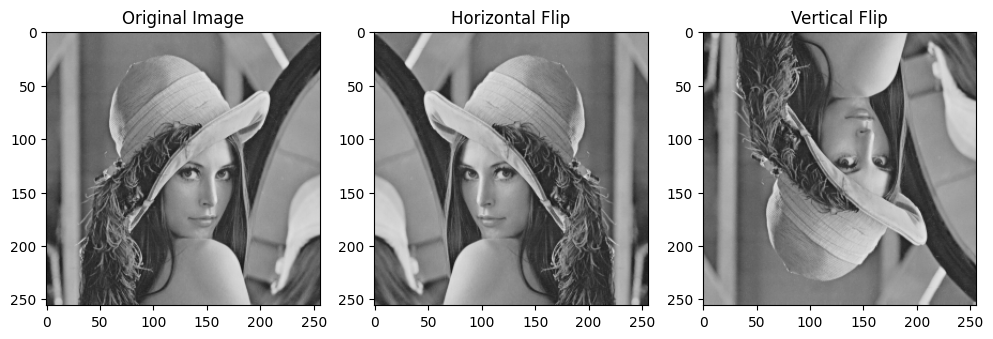

In [6]:
image = cv2.imread("Images/lena.bmp")

flipped_image_vertical = cv2.flip(image,0) #Vertical Flip
flipped_image_horizontal = cv2.flip(image,1) #Horizontal Flip
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1,3,2)
plt.title('Horizontal Flip')
plt.imshow(flipped_image_horizontal, cmap='gray')
plt.subplot(1,3,3)
plt.title('Vertical Flip')
plt.imshow(flipped_image_vertical, cmap='gray')